# **"Curso: Ciência de Dados"**

---


"**Disciplina**: Analise de Dados Textuais"

---

"**Aluno**: Alessandro Moreira"

"**Aluno**: Ernesto Gurgel Valente Neto"

---
**Material**: Trabalho Final

In [ ]:
%config IPCompleter.greedy=True
import nltk
import numpy as np
nltk.download('gutenberg') 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
import datetime

from nltk.corpus import wordnet

from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
print("acabou")

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
acabou


In [ ]:
class Trecho:
  def __init__(self, time, text,tokens):
    self.tempo = time
    self.texto = text
    self.final = "Novo Documento 2020-01-15 06.43.59_2.jpg"
    self.sentimento = 0.0

from datetime import datetime

import re
#f = open("C:\\Users\\Pichau\\Desktop\\datascience\\2bears.txt", "r") #leitura pc Ale
# episode = f.read() #leitura pc Ale

f = open('2bears.txt').read() #leitura ernesto
episode = f #leitura ernesto

tempos =  re.findall("\[.{12}\]",episode) 
    
for separator in tempos:
    episode = episode.replace(separator,"")
    
falas = episode.split("\n\n")
lista = []

for i in range(len(tempos)):
    clean = tempos[i].replace("[","")
    clean = clean.replace("]","")
    clean = datetime.strptime(clean, '%H:%M:%S.%f')
    lower = falas[i].lower()
    lista.append(Trecho(clean,lower,None)) 
    
#print(lista[1].tempo,list[1].texto.lower())


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

teste = "would you rather get hit by a bus than actually take care of the things that might be a bad result? it's a good question. hundred percent. the holiday season is here, and if you if you are an online seller, you know that everyone's buying online and if you're struggling to keep up, try ship station. that's our choice. it's the  astest, easiest, most affordable way to manage and ship your orders in a few clicks. you're managing orders, printing out discounted labels, shipping labels and getting your products out fast."

text_tag = nltk.pos_tag(word_tokenize(teste))
text_ch = nltk.ne_chunk(text_tag)
comments = []
negative = []
positive = []

import csv
with open("reviews.csv", "r") as file:
  reader = csv.reader(file)
  for row in reader:
        comments.append(row)

with open("positive_words.csv", "r") as file:
  reader = csv.reader(file)
  for row in reader:
        positive.append(row)

with open("negative_words.csv", "r") as file:
  reader = csv.reader(file)
  for row in reader:
        negative.append(row)



In [ ]:
def sentiment(text):
    temp = [] #
    text_sent = nltk.sent_tokenize(text)
    for sentence in text_sent:
        n_count = 0
        p_count = 0
        sent_words = nltk.word_tokenize(sentence)
        for word in sent_words:
            for item in positive:
                if(word == item[0]):
                    p_count +=1
            for item in negative:
                if(word == item[0]):
                    n_count +=1
        if(p_count > 0 and n_count == 0):
            temp.append(1)
        elif(n_count%2 > 0):
            temp.append(-1)
        elif(n_count%2 ==0 and n_count > 0):
            temp.append(1)
        else:
            temp.append(0)
    return temp

In [ ]:
def sentiment2(text, tipoSentimento):
    temp = [] #
    tipoSentimento = []
    text_sent = nltk.sent_tokenize(text)
    for sentence in text_sent:
        n_count = 0
        p_count = 0
        sent_words = nltk.word_tokenize(sentence)
        for word in sent_words:
            for item in positive:
                if(word == item[0]):
                    p_count +=1
                    tipoSentimento.append(word)
            for item in negative:
                if(word == item[0]):
                    tipoSentimento.append(word)
                    n_count +=1
        if(p_count > 0 and n_count == 0):
            temp.append(1)
        elif(n_count%2 > 0):
            temp.append(-1)
        elif(n_count%2 == 0 and n_count > 0):
            temp.append(1)  
        else:
            temp.append(0)
    return temp, tipoSentimento

In [ ]:
for i in range(len(lista)):
    lista[i].sentimento = np.average(sentiment(str(lista[i].texto)))

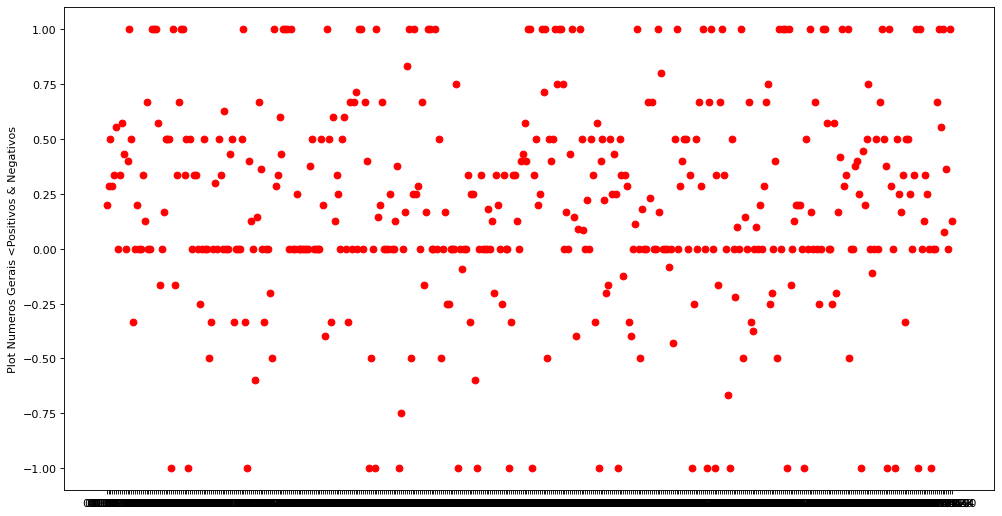

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot([o.tempo.strftime('%H:%M:%S') for o in lista],[o.sentimento for o in lista], 'ro')
plt.ylabel('Plot Numeros Gerais <Positivos & Negativos')
#fig.set_size_inches(25,25)
plt.show()

# **Analise Textual**

---
**Topicos do tema debatido/assuntos**


In [ ]:
from nltk import tokenize
tokenize = tokenize.word_tokenize(f, language='english')
minusculas = set(word.lower() for word in tokenize if word.isalpha())
tag = nltk.pos_tag(tokenize)
chunk = nltk.ne_chunk(tag)
lista_comum = []
lista_comum2 = []
lista_comum3 = []
lista_comum4 = []
lista_comum5 = []
lista_comum6 = []
lista_comum7 = []
lista_comum8 = []
lista_comum9 = []
lista_comum10 = []
lista_comum11 = []
lista_comum12 = []

def normalize_text(txt):
    txt = txt.lower()
    txt = txt.replace(',','')
    txt = txt.replace(';','')
    txt = txt.replace('.','')
    txt = txt.replace('\'','')
    txt = txt.replace('(','')
    txt = txt.replace(')','')
    txt = txt.replace(':','')
    txt = txt.replace('!','')
    txt = txt.replace('?','')
    txt = txt.replace("\\","")
    txt = txt.replace("\"","")
    txt = txt.replace("`","")
    txt = txt.replace('</p>','')
    return txt

normalize_text2bears = normalize_text(str(minusculas))
#normalize_text2bears    

In [ ]:
def analisar_expressoes_texto(chunk,tipo,lista_comum):
  contador = 0
  for entidade_nomeadas in chunk:
    if hasattr(entidade_nomeadas, 'label'):
      if entidade_nomeadas.label() == tipo:
        lista_comum.append(entidade_nomeadas)
        contador += 1
  print("Qtd Localizada: ", contador)

#analisar_expressoes_texto(chunk, "PERSON",lista_comum)

In [ ]:
#Analise de tipos de expressões usadas

#Qtd nomes proprios citados
analisar_expressoes_texto(chunk, "GPE",lista_comum)
#Qtd de citações a nomes de pessoas
analisar_expressoes_texto(chunk, "PERSON", lista_comum2)
#Qtd de citações a Organizações
analisar_expressoes_texto(chunk, "ORGANIZATION", lista_comum3)
#Qtd de citações Localizações
analisar_expressoes_texto(chunk, "LOCATION",lista_comum4)
#Qtd de citações porcentagens
analisar_expressoes_texto(chunk, "PERCENT",lista_comum5)
#Qtd de citações dinheiro
analisar_expressoes_texto(chunk, "MONEY",lista_comum6)
#Qtd de citações Adjetivos
analisar_expressoes_texto(chunk, "JJ",lista_comum7)
#Qtd de citações Construções
analisar_expressoes_texto(chunk, "FAC",lista_comum8)
#Qtd de citações Locais/N cidades
analisar_expressoes_texto(chunk, "LOC",lista_comum9)
#Qtd de citações Instituições
analisar_expressoes_texto(chunk, "ORG",lista_comum10)
#Qtd de citações Produtos
analisar_expressoes_texto(chunk, "PRODUCT",lista_comum11)
#"Qtd de citações Eventos (guerra, esportes, etc): "
analisar_expressoes_texto(chunk, "EVENTS",lista_comum12)

Qtd Localizada:  44
Qtd Localizada:  176
Qtd Localizada:  46
Qtd Localizada:  1
Qtd Localizada:  0
Qtd Localizada:  0
Qtd Localizada:  0
Qtd Localizada:  0
Qtd Localizada:  0
Qtd Localizada:  0
Qtd Localizada:  0
Qtd Localizada:  0


In [ ]:
print("Nomes de Regiões citados",    len(lista_comum), "  ", lista_comum, "\n")
print("Nomes de Pessoas citados",    len(lista_comum2), "  ", lista_comum2, "\n")
print("Nomes Organizações citados",  len(lista_comum3), "  ", lista_comum3, "\n")
print("Nomes Localizações citados",  len(lista_comum4), "  ", lista_comum4, "\n")

Nomes de Regiões citados 44    [Tree('GPE', [('Shopify', 'NNP')]), Tree('GPE', [('Amazon', 'NNP')]), Tree('GPE', [('Kamekona', 'NNP')]), Tree('GPE', [('Siberia', 'NNP')]), Tree('GPE', [('Dayton', 'NNP')]), Tree('GPE', [('Madonna', 'NNP')]), Tree('GPE', [('U.S.', 'NNP')]), Tree('GPE', [('Montreal', 'NNP')]), Tree('GPE', [('God', 'NNP')]), Tree('GPE', [('New', 'NNP'), ('Year', 'NNP')]), Tree('GPE', [('Orlando', 'NNP')]), Tree('GPE', [('Breakfast', 'NNP')]), Tree('GPE', [('Ustream', 'NNP')]), Tree('GPE', [('Skanks', 'NNP')]), Tree('GPE', [('Tomahawks', 'NNP')]), Tree('GPE', [('Chicos', 'NNP')]), Tree('GPE', [('San', 'NNP'), ('Diego', 'NNP')]), Tree('GPE', [('New', 'NNP'), ('Year', 'NNP')]), Tree('GPE', [('Nadia', 'NNP')]), Tree('GPE', [('God', 'NNP')]), Tree('GPE', [('YouTube', 'NNP')]), Tree('GPE', [('Burt', 'NNP')]), Tree('GPE', [('Burt', 'NNP')]), Tree('GPE', [('Silverstone', 'JJ')]), Tree('GPE', [('Exacto', 'NNP')]), Tree('GPE', [('Finish', 'NNP')]), Tree('GPE', [('American', 'NNP')])

Analise de Tópicos/Assuntos mais citados


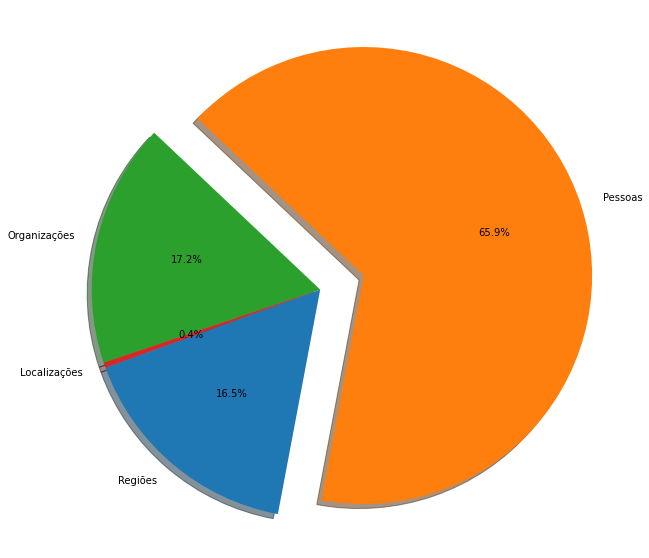

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Regiões', 'Pessoas', 'Organizações', 'Localizações'
sizes = [len(lista_comum), len(lista_comum2), len(lista_comum3), len(lista_comum4)]
explode = (0, 0.2, 0, 0)
fig1, ax1 = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=200)
ax1.axis('equal')
print("Analise de Tópicos/Assuntos mais citados")
plt.show()

# **Analise Emocional**

---
**Topicos do tema debatido/assuntos**


In [ ]:
tipoSentimento = []
tipoSentimento = (sentiment2(normalize_text2bears, tipoSentimento))
print(tipoSentimento)

([1], ['brilliant', 'simple', 'right', 'yes', 'okay', 'popular', 'quit', 'not', 'nice', 'free', 'funny', 'cute', 'no', 'problem', 'fun', 'up', 'open', 'whole', 'issues', 'rewarding', 'love', 'learned', 'ready', 'adorable', 'giving', 'independent', 'positive', 'horrible', 'never', 'now', 'wow', 'issue', 'boring', 'amazing', 'smelly', 'suck', 'calm', 'fight', 'surprising', 'beautiful', 'one', 'tops', 'certain', 'idea', 'hurt', 'pretty', 'broken', 'old', 'natural', 'quick', 'absolutely', 'fresh', 'champ', 'easy', 'creative', 'hate', 'genius', 'fuck', 'honest', 'shit', 'very', 'welcome', 'stressful', 'insane', 'choice', 'fear', 'kind', 'super', 'active', 'lose', 'sucks', 'cold', 'well', 'dead', 'hard', 'fair', 'clean', 'dirty', 'happy', 'great', 'zero', 'believe', 'knowing', 'imagine', 'bad', 'perfect', 'mean', 'fine', 'refreshing', 'stinky', 'good', 'cool', 'shocking', 'crazy', 'fantastic', 'special', 'green', 'pain', 'stupid', 'awesome', 'like', 'gross'])


In [ ]:
#Lista para contagem
listaContagem = ['open', 'good', 'lose', 'funny', 'great', 'brilliant', 'fresh', 'tops', 'cute', 'smelly', 'hate', 'fuck', 'fair', 'fantastic', 'dirty', 'clean', 'cool', 'horrible', 'right', 'refreshing', 'choice', 'easy', 'up', 'creative', 'shit', 'stinky', 'genius', 'free', 'dead', 'quit', 'very', 'whole', 'surprising', 'perfect', 'no', 'fear', 'knowing', 'stupid', 'broken', 'calm', 'learned', 'gross', 'special', 'believe', 'zero', 'giving', 'green', 'certain', 'old', 'super', 'crazy', 'bad', 'not', 'hard', 'adorable', 'absolutely', 'beautiful', 'positive', 'independent', 'kind', 'insane', 'suck', 'happy', 'popular', 'fight', 'hurt', 'imagine', 'love', 'problem', 'wow', 'active', 'issues', 'nice', 'stressful', 'pain', 'quick', 'idea', 'shocking', 'one', 'cold', 'amazing', 'simple', 'welcome', 'sucks', 'fun', 'awesome', 'yes', 'okay', 'rewarding', 'issue', 'ready', 'fine', 'natural', 'honest', 'boring', 'mean', 'champ', 'never', 'like', 'pretty', 'well', 'now']

In [ ]:
words_total = len(minusculas)
countpalavras = 0
countOpen = 0

lista_word_are = []
for word in minusculas:
  for palavra in listaContagem:
    if re.search(palavra,word):
      lista_word_are.append(word)
      countpalavras +=1    

meand = countpalavras/words_total

In [ ]:
corpusFreqPositiva = nltk.FreqDist(lista_word_are)
FreqResultPositiva = corpusFreqPositiva.most_common()

In [ ]:
print("Total de palavras analisadas: ", len(minusculas))
print("Média de Palavras Positivas utilizadas por Sentença: ", meand)
print("Total de Palavras positivas: ", countpalavras)
print("Palavras positivas mais Frequentes: ", FreqResultPositiva[:10])

Total de palavras analisadas:  2199
Média de Palavras Positivas utilizadas por Sentença:  0.11550704865848113
Total de Palavras positivas:  254
Palavras positivas mais Frequentes:  [('knowing', 3), ('not', 2), ('notes', 2), ('funny', 2), ('issues', 2), ('honestly', 2), ('hypnotic', 2), ('whatnot', 2), ('now', 2), ('everyone', 2)]


# **Palavras Positivas mais usadas (10)**

---

> Palavras positivias mais frequentemente usadas na conversação


Palavras positivas mais Frequentes:  [('knowing', 3), ('not', 2), ('notes', 2), ('funny', 2), ('issues', 2), ('honestly', 2), ('hypnotic', 2), ('whatnot', 2), ('now', 2), ('everyone', 2)]


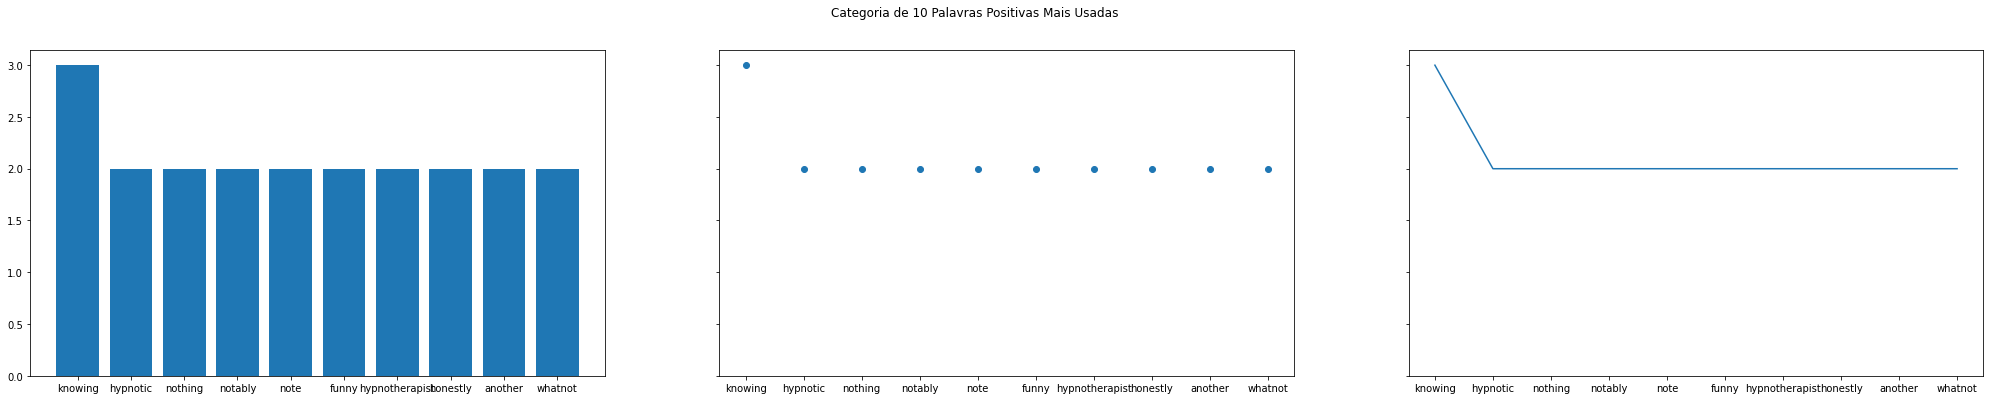

In [ ]:
import matplotlib.pyplot as plt

data = {'knowing': 3, 'hypnotic': 2, 'nothing': 2, 'notably': 2, 'note': 2, 'funny': 2, 'hypnotherapist': 2, 'honestly': 2, 'another': 2, 'funny': 2, 'whatnot': 2}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(35, 6), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categoria de 10 Palavras Positivas Mais Usadas')
print("Palavras positivas mais Frequentes: ", FreqResultPositiva[:10])

# **PORCENTAGEM DAS PALAVRAS POSITIVAS MAIS USADAS**

---

> Porcentagem de palavras utilizadas positivas em relação a uma parte do tema abordado


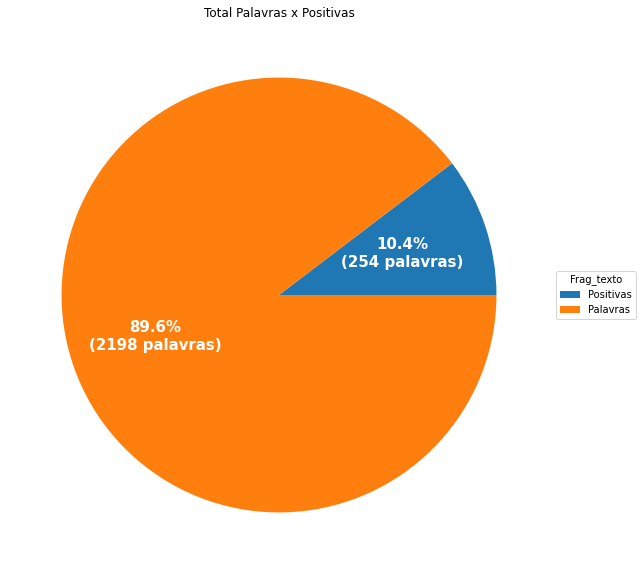

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(80, 10), subplot_kw=dict(aspect="equal"))
recipe = ["254 Positivas",
          "2199 Palavras"]
data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} palavras)".format(pct, absolute)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          title="Frag_texto",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=15, weight="bold")
ax.set_title("Total Palavras x Positivas")
plt.show()

# **Termos Mais Frequentes**

---

> Analise dos termos mais frequentes utilizados em uma parte da conversação



In [ ]:
def ignorar_texto(txt):
  listaResultado = []
  ignorar = [',',';','.',':','!','?','\\','//','[',']',1,2,3,4,5,6,7,8,9,0,'00:00:00.530']
  for word in txt:
    if not word in ignorar:
      listaResultado.append(word)
  return listaResultado

prFreq = nltk.FreqDist(ignorar_texto(tokenize))
FreqResult = prFreq.most_common()
print(FreqResult[:25])
ListaPP1 = []
ListaPP2 = []
ListaPP1 = [word[1] for word in FreqResult if word[1]]
ListaPP2 = [word[0] for word in FreqResult if word]
titulos = []
for word in ListaPP2:
    titulos.append(word)   
qntd = []
for valor in ListaPP1:
    qntd.append(valor)
 

[('I', 1084), ('you', 497), ('like', 457), ("'s", 440), ('the', 436), ('to', 436), ('a', 427), ('and', 389), ('it', 388), ('that', 379), ('of', 216), ('is', 204), ('was', 197), ('in', 193), ('do', 191), ('And', 191), ('Yeah', 163), ('this', 159), ("n't", 156), ("'re", 151), ('my', 140), ('just', 135), ('what', 131), ('we', 127), ('on', 124)]


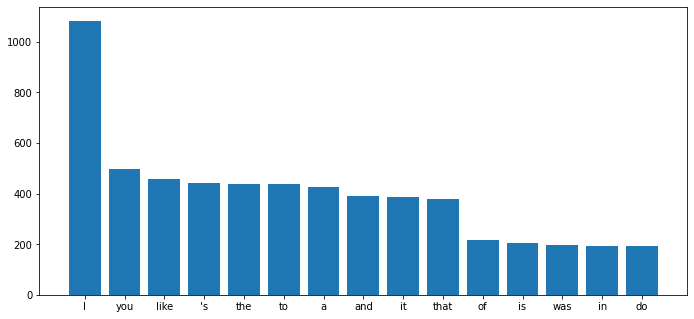

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
#valores para plotar (maximo)
titulos = titulos[:15] 
qntd = qntd[:15]   
ax.bar(titulos,qntd)
plt.show()

# **A diferença entre de palavras entre dois Interlocutores**

---
> Diferença entre termos usados entre a medida que a conversa evolui
> Considerando o funcionamento do inicio de conversações entre dois interlocutores inicialmente e o fim da mesma




In [ ]:
#Leitura e Preparação
parte_1 = tokenize
parte_1 = ignorar_texto(parte_1)
Base_analise = [parte_1[i:i+1] for i in range(0, len(parte_1), 1)]
print("Tamanho Maximo: ", len(Base_analise))
#Parte 1 - Inicio da Conversa (25%)
Inicio = [parte_1[i:i+1] for i in range(0, 4896, 1)]
len(Inicio)
print(Inicio)
#Parte 2 - Meio da Conversa (50%)
Meio_1 = [parte_1[i:i+1] for i in range(4896, 9792, 1)]
len(Meio_1)
print(Meio_1)
#Parte 3 - Meio da Conversa (75%)
Meio_2 = [parte_1[i:i+1] for i in range(9792, 14688, 1)]
len(Meio_2)
print(Meio_2)
Fim = [parte_1[i:i+1] for i in range(14688, 19585, 1)]
len(Fim)
print(Fim)

def Diff(li1, li2):
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2]
    return li_dif

def mais_comum(List): 
    counter = 0
    utilizada = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i
            utilizada +=1  
    return num , utilizada  

Tamanho Maximo:  19585
[['Then'], ['she'], ['said'], ['I'], ["'ll"], ['do'], ['everything'], ['I'], ["'ll"], ['clean'], ['your'], ['teeth'], ['or'], ['check'], ['for'], ['oral'], ['cancer'], ['and'], ['I'], ['was'], ['like'], ['I'], ["'m"], ['out'], ['soon'], ['she'], ['said'], ['She'], ['said'], ['that'], ['I'], ['went'], ['I'], ['was'], ['like'], ['rather'], ['just'], ['find'], ['out'], ['I'], ["'m"], ['dead'], ['one'], ['day'], ['Like'], ['I'], ['just'], ['it'], ['that'], ['gives'], ['me'], ['anxiety'], ['And'], ['I'], ['00:00:14.850'], ['Would'], ['you'], ['rather'], ['get'], ['hit'], ['by'], ['a'], ['bus'], ['than'], ['actually'], ['take'], ['care'], ['of'], ['the'], ['things'], ['that'], ['might'], ['be'], ['a'], ['bad'], ['result'], ['It'], ["'s"], ['a'], ['good'], ['question'], ['Hundred'], ['percent'], ['The'], ['holiday'], ['season'], ['is'], ['here'], ['and'], ['if'], ['you'], ['if'], ['you'], ['are'], ['an'], ['online'], ['seller'], ['you'], ['know'], ['that'], ['everyone']

In [ ]:
#Comparando Temas:
Resultado_ini_meio1 = Diff(Inicio, Meio_1)
Resultado_meio1_meio2 = Diff(Meio_1, Meio_2)
Resultado_meio2_Fim = Diff(Meio_2, Fim)
Resultado_ini_fim =  Diff(Inicio, Fim)
print("Diferença entre termos usados:", len(Resultado_ini_meio1))
print("Diferença entre termos usados:", len(Resultado_meio1_meio2))
print("Diferença entre termos usados:", len(Resultado_meio2_Fim))
print("Diferença entre termos usados:", len(Resultado_ini_fim))

Diferença entre termos usados: 1833
Diferença entre termos usados: 1915
Diferença entre termos usados: 2042
Diferença entre termos usados: 2042


In [ ]:
print(mais_comum(Resultado_ini_meio1))
print(mais_comum(Resultado_meio1_meio2))
print(mais_comum(Resultado_meio2_Fim))
print(mais_comum(Resultado_ini_fim))

(['chloroform'], 4)
(['salvia'], 7)
(['original'], 9)
(['original'], 6)


# **> Total de palavras usadas por quartil na conversação e aproximação das mesmas na abordagem do assunto (Nível de Diferença)**

<Figure size 2000x640 with 0 Axes>

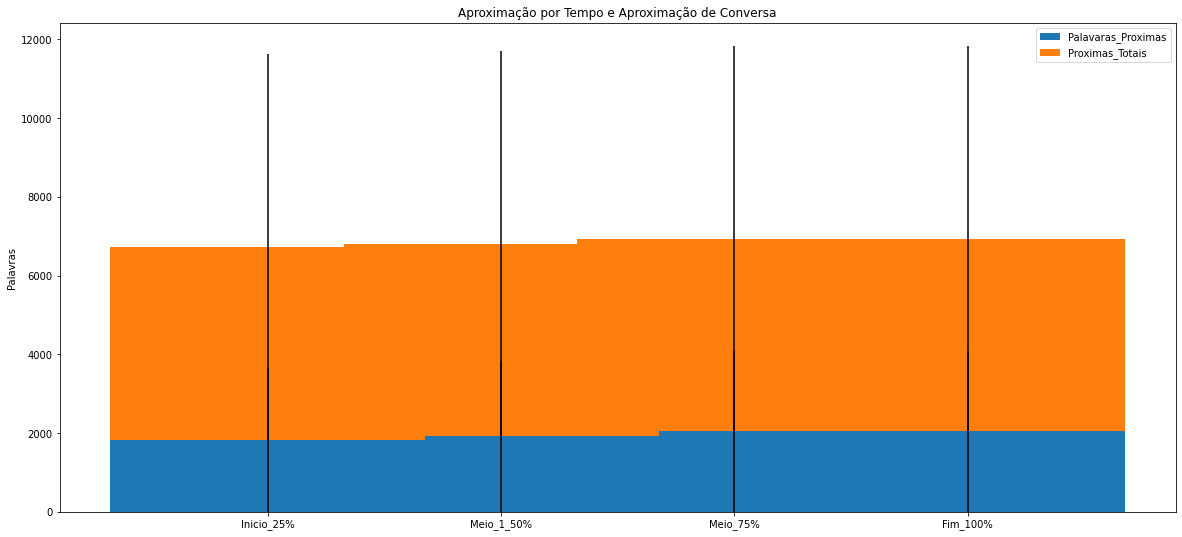

In [ ]:
import matplotlib.pyplot as plt
figure(num=None, figsize=(25, 8), dpi=80, facecolor='w', edgecolor='k')
labels = ['Inicio_25%', 'Meio_1_50%', 'Meio_75%', 'Fim_100%']
palavaras_proximas = [1833, 1915, 2042, 2042]
proximas_totais = [4896, 4896, 4896, 4896]
width = 1.35

fig, ax = plt.subplots(figsize=(20,9))
ax.bar(labels, palavaras_proximas, width, yerr=palavaras_proximas, label='Palavaras_Proximas')
ax.bar(labels, proximas_totais, width, yerr=proximas_totais, bottom=palavaras_proximas,
       label='Proximas_Totais')

ax.set_ylabel('Palavras')
ax.set_title('Aproximação por Tempo e Aproximação de Conversa')
ax.legend()
plt.show()

# **Palavras mais usadas em cada quartil da conversa (Nível de Diferença)**

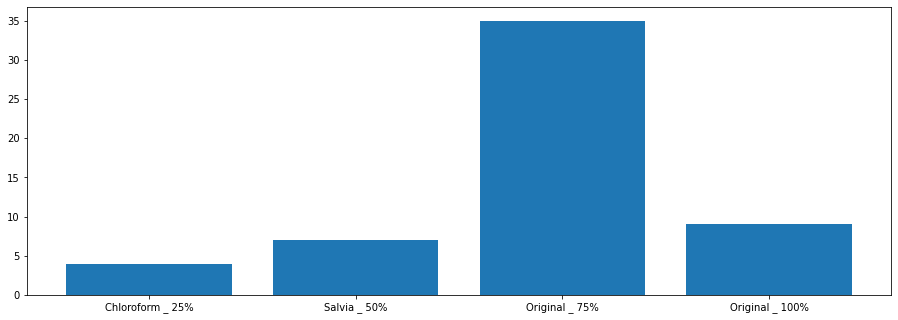

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
langs = ['Chloroform _ 25%', 'Salvia _ 50%', 'Original _ 75%', 'Original _ 100%']
students = [4,7,35,9]
ax.bar(langs,students)
plt.show()